<a href="https://colab.research.google.com/github/BedinEduardo/Colab_Repositories/blob/master/NN_Classification_Pytorch_Course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NN Classification with PyTorch


###What were we going to cover?

1. Architecture of a NN classification model

2. Input shapes and outputs shapes of a classification model (features and labels)

3. Creating custom data to view, fit on and predict on

4. Steps in modeling

-  Creating a model, setting a loss function and optmiser, creating a training loop, evaluating a model

5. Saving and loading models

6. Harnessing the power of non-linearity

7. Different classification evaluation methods

---



###Classification inputs and outputs

 The big takeway from here is numerical enconding outputs in numerical enconding, but we want to change these numerical coding from the outputs to something that we understand.

 Classification is a problem of predicting whether someting is one thing or another (there can be multiple things as the options)


### Architecture of a classification model

Tipical architecure of Classification Model
1. Hyperparameters
2. Binariclassification
3. Multiclas classification

a. Hydden layer - Neurons  - customize the neurons and hydden layers

## 1. Make classification data and get ir ready

In [ ]:
# importing libraries and data sets

import sklearn

In [ ]:
from sklearn.datasets import make_circles

#make samples -  1000
n_samples = 1000

#build circles
X, y = make_circles(n_samples,
                    noise = 0.1,
                    random_state=43)

In [ ]:
len(X), len(y)   #featureas and labels


(1000, 1000)

In [ ]:
print(f'first 5 samples of X: {X[:5]}')
print(f'first 5 samples of y: {y[:5]}')

first 5 samples of X: [[-0.01948701 -0.79547922]
 [ 0.73671295 -0.20079861]
 [-0.63638224  0.81985222]
 [ 0.78061982  0.12542045]
 [-0.50503673  0.3053395 ]]
first 5 samples of y: [1 1 0 1 1]


## Make dataFrame of circles

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                       "X2": X[:,1],
                       "label":y})

circles.head(10)

,X1,X2,label
0,-0.019487,-0.795479,1
1,0.736713,-0.200799,1
2,-0.636382,0.819852,0
3,0.780620,0.125420,1
4,-0.505037,0.305340,1
5,-0.526521,0.676034,1
6,0.154783,0.649875,1
7,-0.214864,0.793621,1
8,0.720920,-0.563157,0
9,0.126607,-0.809807,1


In [ ]:
circles.label.value_counts()

,count
label,
1,500
0,500


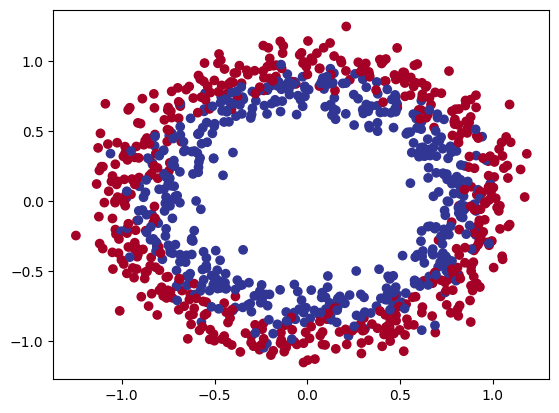

In [ ]:
#VISUALIZE VISUALIZE   -- classify if is red or blue dot
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

Note: The data we are working if often referred to as toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals.

###1.1 Checking input and output shapes


In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
type(X), X.dtype


(numpy.ndarray, dtype('float64'))

In [ ]:
#View the first example of features and labels
X_samples = X[0]
y_samples = y[0]

print(f"Values of one sample of X: {X_samples} \n Values of one sample of y: {y_samples}")
print(f"Shape of X: {X_samples.shape} \n Shape of y: {y_samples.shape}")

Values of one sample of X: [-0.01948701 -0.79547922] 
 Values of one sample of y: 1
Shape of X: (2,) 
 Shape of y: ()


###1.2 Turn data into tensors and build train and test splits


In [ ]:
#turn data into tensors
import torch
torch.__version__

'2.5.1+cu121'

In [ ]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [ ]:
#turn data into tensors
X = torch.from_numpy(X).type(torch.float)

y = torch.from_numpy(y).type(torch.float)

In [ ]:
X[:5], y[:5]

(tensor([[-0.0195, -0.7955],
         [ 0.7367, -0.2008],
         [-0.6364,  0.8199],
         [ 0.7806,  0.1254],
         [-0.5050,  0.3053]]),
 tensor([1., 1., 0., 1., 1.]))

In [ ]:
type(X), X.dtype

(torch.Tensor, torch.float32)

In [ ]:
#Split data into training and test sets
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2, #20% of data will be used to test
                                                    random_state=43)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

### 2. Building a model

Let's build a model to classify our blue and red dots

To do, we want to:
1. Set up device agnostic code so our code will run on an accelerator (GPU) if there is one

2. Construct a model (by subclassing .`nn.Model`)

3. Define a loss function and optmizer

4. Create a training and test loop

In [ ]:
#Import PyTorch
import torch
from torch import nn

#Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cpu'

In [ ]:
X_train

tensor([[ 0.2606, -0.9065],
        [-0.7456,  0.2180],
        [ 0.3066, -0.6863],
        ...,
        [ 0.0525,  1.0580],
        [-0.8112, -0.3234],
        [ 0.6194,  0.8464]])

Now we have setup device agnostic code, let's build a model that:

1. Subclass `nn.Module` (almost all models in PyTorch subclass `nn.Module`)

2. Build 2 `nn.Linear()` layers that are capable of handling the shapes of our data

3. Defins a `forward()` method that outlines the forward pass (or forward computation of the model)

4. Instaciate an instance of the model class and send it to the target device



In [ ]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV10(nn.Module):
  def __init__(self):
    super().__init__()

    # 2. Build 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5)  #in_features of next layer shoud be the same number of the output of the previous layer
    self.layer_2 = nn.Linear(in_features=5, out_features=1)  #1 is the output layer - single feature - for bigger models the number of features increase, and the layers too, here is a simple example

    #self.two_linear_layers = nn.Sequential(
     #   nn.Linear(in_features=2, out_features=5),
     #   nn.Linear(in_features=5, out_features=1)
    #)

  # 3. Define the forward method() that outlines the forward pass
  def forward(self, x):

    #return two_linear_layers(x)
    return self.layer_2(self.layer_1(x))   #x -> layer_1 -> layer_2 - layer_2 -> Output

# 4. Instanciate an instance of our model class and send it to the target device
model_0 = CircleModelV10().to(device)

In [ ]:
X_train.shape

torch.Size([800, 2])

In [ ]:
#Let's replicate the model above usinf nn.Sequencial()

model_1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_1

#The benefits of subcalssing the NN, and that's why started from here, is that when you have more complex operations, such as things, you would like to construct in here and more complex forward pass, it is important
#to know how to build your won subclasses of an NN module.

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_1.state_dict()  #PyTorch create the paramters behind the scenes

OrderedDict([('0.weight',
              tensor([[-0.0471, -0.2367],
                      [-0.0338, -0.3548],
                      [ 0.5806,  0.2975],
                      [-0.3869, -0.4261],
                      [-0.1855,  0.0917]])),
             ('0.bias', tensor([-0.5812,  0.1951,  0.3931,  0.6985,  0.3185])),
             ('1.weight',
              tensor([[-0.0910,  0.0399,  0.0266, -0.0145,  0.3392]])),
             ('1.bias', tensor([-0.0417]))])

In [ ]:
##Make predictions with untrained model
untrained_model = model_1(X_test.to(device))

print(f"Lenght of predictions: {len(untrained_model)}, \n Shape: {untrained_model.shape}")

print(f"Lenght of test samples: {X_test}, \n Shape: {X_test.shape}")

print(f"10 first predictions: \n {untrained_model[:10]} ")

print(f"First 10 labels: \n {y_test}")

Lenght of predictions: 200, 
 Shape: torch.Size([200, 1])
Lenght of test samples: tensor([[ 0.4322, -0.7035],
        [ 0.4045, -1.0360],
        [ 0.6775, -0.3418],
        [ 0.4771,  0.7429],
        [ 0.6844,  0.5267],
        [-0.9287,  0.1358],
        [ 0.8058, -0.3389],
        [ 0.9913,  0.0616],
        [-0.5563,  0.6424],
        [-0.8598,  0.3083],
        [ 0.7391,  0.1910],
        [ 0.8202, -0.3840],
        [-0.1114, -0.8553],
        [ 0.3927, -0.7843],
        [-0.4366, -0.6220],
        [ 0.0589, -0.8034],
        [ 0.6958,  0.2033],
        [-0.3762,  0.7439],
        [ 0.8390, -0.1156],
        [ 0.9151,  0.0465],
        [ 0.5755, -0.8831],
        [-0.3872, -0.6796],
        [ 0.4949, -0.7525],
        [-1.1195, -0.3024],
        [ 0.5793, -0.5646],
        [ 0.8323,  0.4879],
        [-0.1811,  0.9686],
        [ 0.3034,  0.6276],
        [ 0.7855, -0.6351],
        [ 0.8578,  0.5711],
        [-0.8662, -0.2226],
        [-0.5589, -0.3607],
        [ 0.5829, -0.3

In [ ]:
y_test[:10], X_test[:10]

(tensor([1., 0., 1., 1., 0., 1., 0., 0., 1., 1.]),
 tensor([[ 0.4322, -0.7035],
         [ 0.4045, -1.0360],
         [ 0.6775, -0.3418],
         [ 0.4771,  0.7429],
         [ 0.6844,  0.5267],
         [-0.9287,  0.1358],
         [ 0.8058, -0.3389],
         [ 0.9913,  0.0616],
         [-0.5563,  0.6424],
         [-0.8598,  0.3083]]))

###Loss Function, optmizer, and evaluation loop

Which loss function or optmizer should you use?

Again, this a problem specific

For example, for regression you might want predict a number - MAE or MSE - Mean Absolute Error or Mean Squared Error

For classification, binary cross entropy, or categorical cross entropy (cross entropy).

As reminder, the loss function measures **how wrong** your model predictions are.

Logit - In context of DL the logists layer means the layer thate feeds in to softmax (or other such normalization). The output of the softmax are the probabilities for the classification task and its input is logits layer. The logits normaly produces values from -infinity to +infinity, and softmax layer normalize it inot 0 to 1.

For optmizers, two of the most common and useful are SGD and Adam, however PyTorch has many built-in options.

* For the loss function were are going to use `torch.nn.BECWithLogitsLoss()`, for more on what binary cross entropy (BCE) is, check out this article
* LOGITS definition
* For different optmizers see `torch.optim`


In [ ]:
#Set up the loss function
#loss_fn nn.BCELoss() #requires inputs to have gone through the sigmoid activation function prior to input BCELoss
loss_fn = nn.BCEWithLogitsLoss()  # BCEWithLogitsLoss = sigmoid activation function

In [ ]:
optmizer = torch.optim.SGD(params=model_0.parameters(),
                           lr=0.1)

In [ ]:
#calculate accuracy - out of 100 examples, how model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred))*100

  return acc

### Training a Model

To train a model, we ned to build a training loop:

Following the steps below,

1. Forward pass
2. Calculate the loss
3. Zero gradients
4. Perform backpropagation on the loss
5. Step the optmizer - gradient descent

###Going from raw logits -> prediciton probabilities -> prediction labs

Our model outputs are going to be raw **logits**.

We can convert the **logits** into **prediction probabilities** by passing them to some kind of activation functon (e.g.: sigmoid for binary classification and softmax for multiclass classification)

The we can convert our model prediction probabilities to **prediction labels** by either rounding them or taking `argmax()`

In [ ]:

model_1


Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
#view the first 5 outputs of the forward pass on the test data
model_1.eval()
with torch.inference_mode():
  y_logits = model_1(X_test.to(device))[:5]
y_logits

tensor([[0.0735],
        [0.0571],
        [0.0830],
        [0.1478],
        [0.1284]])

In [ ]:
y_test[:5]

tensor([1., 0., 1., 1., 0.])

In [ ]:
#Use the sigmoid activation function on our model logits
y_pred_probs = torch.sigmoid(y_logits)

y_pred_probs  #the same format values of labels - transform one number in another

tensor([[0.5184],
        [0.5143],
        [0.5207],
        [0.5369],
        [0.5321]])

For our prediction probability values, we need to perform a range-style rounding on them:

* `y_pred_probs` >=0.5, `y=1` (class 1)
* `y_pred_probs` <0.5, `y=0` (class1)

In [ ]:

torch.round(y_pred_probs)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [ ]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

#in full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

#check for equality
print(f"Equality: {torch.eq(y_preds.squeeze(), y_pred_labels.squeeze())}")

#get rid of extra dimensions
y_preds.squeeze()

Equality: tensor([False, False, False, False, False])


tensor([1., 1., 1., 1., 1.])

In [ ]:
y_test[:5]

tensor([1., 0., 1., 1., 0.])

###Building a training and testing loop

In [ ]:
torch.manual_seed(43)

#Set the number of epochs
epochs = 100

#put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
print(X_train.shape)
#input()

X_test, y_test = X_test.to(device), y_test.to(device)

#build training and evaluation loop
for epoch in range(epochs):
  ###training
  model_1.train()  #training mode
  #1. forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))  #round the number predicted and send it to activation function - sigmoid
  print(y_logits.shape)

  #2. calculate loss and accuracy
  #loss = loss_fn(torch.sigmoid(y_logits),   #this loss nn.BCELoss expects prediction probabilities as input
   #              y_train)

  loss = loss_fn(y_logits,
                 y_train)  #this loss expect raw logits as inputs

  acc = accuracy_fn(y_true= y_train,
                    y_pred=y_pred)

  #3. Optmizer zero_grad
  optmizer.zero_grad()

  #4. Loss backward  - backpropagation
  loss.backward()

  #5. Optmizer step - gradient descent
  optmizer.step()

  ###TESTING
  model_1.eval()  #eval mode
  with torch.inference_mode():
    #1. forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #2. calculate test loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)

    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    #print out what happening
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

torch.Size([800, 2])
torch.Size([800])
Epoch: 0 | Loss: 0.69512, Acc: 50.25% | Test Loss: 0.69705, Test Accuracy: 49.00%
torch.Size([800])
torch.Size([800])
torch.Size([800])
torch.Size([800])
torch.Size([800])
torch.Size([800])
torch.Size([800])
torch.Size([800])
torch.Size([800])
torch.Size([800])
Epoch: 10 | Loss: 0.69512, Acc: 50.25% | Test Loss: 0.69705, Test Accuracy: 49.00%
torch.Size([800])
torch.Size([800])
torch.Size([800])
torch.Size([800])
torch.Size([800])
torch.Size([800])
torch.Size([800])
torch.Size([800])
torch.Size([800])
torch.Size([800])
Epoch: 20 | Loss: 0.69512, Acc: 50.25% | Test Loss: 0.69705, Test Accuracy: 49.00%
torch.Size([800])
torch.Size([800])
torch.Size([800])
torch.Size([800])
torch.Size([800])
torch.Size([800])
torch.Size([800])
torch.Size([800])
torch.Size([800])
torch.Size([800])
Epoch: 30 | Loss: 0.69512, Acc: 50.25% | Test Loss: 0.69705, Test Accuracy: 49.00%
torch.Size([800])
torch.Size([800])
torch.Size([800])
torch.Size([800])
torch.Size([800])


In [ ]:
loss_fn


BCEWithLogitsLoss()

### 4. Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything

So to inspect it let's make some predictions and make them visual!

in other words, "visualize, visualize"

To do so, we are going to import a function called `plot_decision_boundary()`


In [ ]:
import requests
from pathlib import Path  #import scrips

#download help functions from PyTorch repo (if it's not already downloaded)
if Path("help_functions.py").is_file():
  print("Helper function.py already exists, skipping downloading")

else:
  print("Download helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


Download helper_functions.py


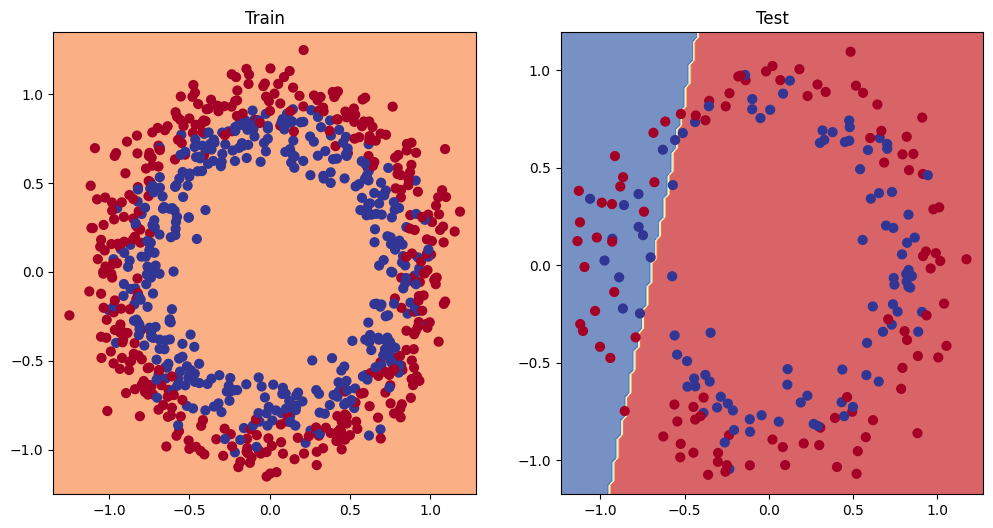

In [ ]:
#plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test )

### 5.1 Improving our model - from a model perspective

* Add more layers - give the model more chances to learn about pattens in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer - more epochs
* Changing the activation function
* Change the learning rate
* Change the loss function

These options are all from model perspective because they deal directly with the model, rather than the data.

And because this options are all values we (machine learning engineers and data scientist) can change, they are refered as **hyperparameters**.

Let's try to improve our model by:
* Adding more hidden units: 5 -> 10
* Increase the number of layer: 2 -> 3
* Increase the number of epochs: 100 -> 1000

When you are modeling ML model,you should modify only a hyperparameter per step, mainly the numbers of layers and hidden units - experimet tracking

In [ ]:
model_1.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0471, -0.2367],
                      [-0.0338, -0.3548],
                      [ 0.5806,  0.2975],
                      [-0.3869, -0.4261],
                      [-0.1855,  0.0917]])),
             ('0.bias', tensor([-0.5812,  0.1951,  0.3931,  0.6985,  0.3185])),
             ('1.weight',
              tensor([[-0.0910,  0.0399,  0.0266, -0.0145,  0.3392]])),
             ('1.bias', tensor([-0.0417]))])

In [ ]:
class CircleModelV1(nn.Module):   #nn.Sequential is a version of nn.Module, but in nn.Module we can subclass the function in nn.Sequence not - use the standard
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)  #out_features =1 a shape of a number - prediction - regresion

  def forward(self, x):
    #z = self.layer_1(x)
    #z = self.layer_2(z)
    #z = self.layer_3(z)
    #return z

    return self.layer_3(self.layer_2(self.layer_1(x)))   #compute layer one, and the output compute in layer 2, and the compute in layer 3
    #this way of writing operations leverage speed ups where possible behind the scenes

model_2 = CircleModelV1().to(device)

model_2

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
model_2.state_dict()


OrderedDict([('layer_1.weight',
              tensor([[-0.0651, -0.4292],
                      [ 0.5954, -0.2175],
                      [-0.4977, -0.5857],
                      [ 0.1286, -0.6139],
                      [ 0.3502,  0.1772],
                      [ 0.6211, -0.5179],
                      [ 0.0270,  0.0474],
                      [ 0.0531,  0.2911],
                      [-0.1025, -0.3166],
                      [ 0.4802, -0.4861]])),
             ('layer_1.bias',
              tensor([-0.5555,  0.3198, -0.2488,  0.5505, -0.5207,  0.4772,  0.0884, -0.1219,
                       0.5120, -0.3121])),
             ('layer_2.weight',
              tensor([[ 0.0528, -0.1083,  0.1121,  0.1294,  0.2661, -0.1684,  0.0795, -0.0238,
                        0.2312, -0.2091],
                      [-0.1085,  0.2317,  0.1234, -0.0853,  0.0990,  0.1164, -0.0955, -0.2551,
                       -0.2440,  0.1905],
                      [-0.0319,  0.1652, -0.2403,  0.2791,  0.0994, -0.0

In [ ]:
##Create a loss function create an optmizer, write a training and evaluation loop for model_2
#Loss
loss_fn_2 = nn.BCEWithLogitsLoss()

#Optmizer
optimizer_2 = torch.optim.SGD(params=model_2.parameters(),
                              lr=0.1)

#training and evaluation loop
torch.manual_seed(43)
torch.cuda.manual_seed(43)

#Train for longer
epochs = 1000

#Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ##training
  model_2.train()  #put to train
  # 1. Forward pass
  y_logits = model_2(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))  #logits -> preds probabilities -> prediction labels

  print(y_logits.shape, "\n")
  print(y_train.shape)

  # 2. Loss / Acc
  loss = loss_fn_2(y_logits, y_train)  #because was used BCEWithLogits loss function
  aqcc = accuracy_fn(y_true=y_train,
                     y_pred=y_pred)

  # 3. Optmizer zero grad
  optimizer_2.zero_grad()

  # 4. Loss backwards  - backpropagation
  loss.backward()

  # 5.Optimizer step - gradient descent
  optimizer_2.step()

  ####TESTING
  model_2.eval()   #test mode
  with torch.inference_mode():
    #1.Forwardpass
    test_logits2 = model_1(X_test).squeeze()
    test_pred2 = torch.round(torch.sigmoid(test_logits))
    #calculate the loss
    test_loss2 = loss_fn_2(test_logits2,
                        y_test)
    #test accuracy
    test_acc2 = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

  #printing whats happens
  if epoch % 100 == 0:
   print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

torch.Size([800]) 

torch.Size([800])
Epoch: 0 | Loss: 0.69802, Acc: 50.25% | Test Loss: 0.69705, Test acc: 49.00%
torch.Size([800]) 

torch.Size([800])
torch.Size([800]) 

torch.Size([800])
torch.Size([800]) 

torch.Size([800])
torch.Size([800]) 

torch.Size([800])
torch.Size([800]) 

torch.Size([800])
torch.Size([800]) 

torch.Size([800])
torch.Size([800]) 

torch.Size([800])
torch.Size([800]) 

torch.Size([800])
torch.Size([800]) 

torch.Size([800])
torch.Size([800]) 

torch.Size([800])
torch.Size([800]) 

torch.Size([800])
torch.Size([800]) 

torch.Size([800])
torch.Size([800]) 

torch.Size([800])
torch.Size([800]) 

torch.Size([800])
torch.Size([800]) 

torch.Size([800])
torch.Size([800]) 

torch.Size([800])
torch.Size([800]) 

torch.Size([800])
torch.Size([800]) 

torch.Size([800])
torch.Size([800]) 

torch.Size([800])
torch.Size([800]) 

torch.Size([800])
torch.Size([800]) 

torch.Size([800])
torch.Size([800]) 

torch.Size([800])
torch.Size([800]) 

torch.Size([800])
torch.Size(

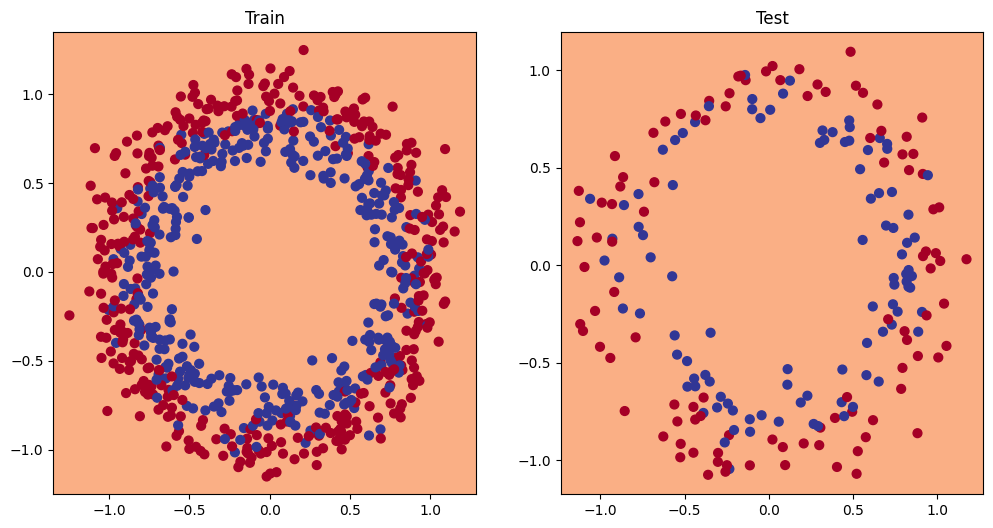

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

###Preparing data to see if our model can fit a straight line

One way to troubleshoot to a larger problem is to test out a smaller problem.



In [ ]:
# Create a some data  (same the notebook one )
weight =0.7
bias =0.3
start = 0
end = 1
step = 0.01

#build data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias  #inear regression formula(withou epsilon)

#check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
#build traing and test split
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

#check the lenghts of each
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

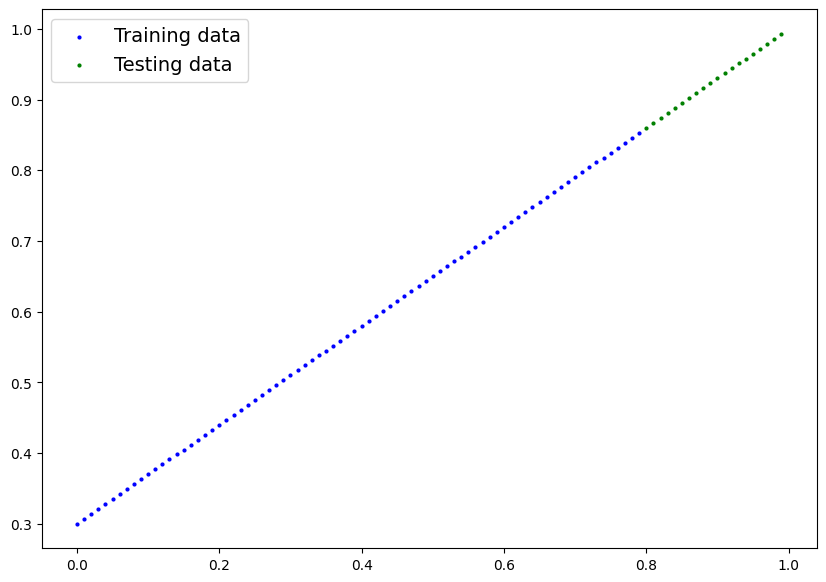

In [ ]:
plot_predictions(train_data= X_train_regression,
                 train_labels= y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

In [ ]:
model_2


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

###Adjusting the model (model_2) to fit a straight line

In [ ]:
X_train_regression[:5], y_train_regression[:5]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
#Same architecture as model_2 but using nn.sequential

model_3 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_3

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
#Loss and optmizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.01)

In [ ]:
#train the model
torch.manual_seed(43)
torch.cuda.manual_seed(43)

#set the number of epochs
epochs = 1000

#put the data for target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)


In [ ]:
#tTraining
for epoch in range(epochs):
  y_pred = model_3(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()  #watch out with the names =), can confuse during the model modeling

  #Testing
  model_3.eval()
  with torch.inference_mode():
    test_pred = model_3(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

    #print what happens
  if epoch %100 == 0:
    print(f'Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}')   #when work with regression does not have accuracy - only a value

Epoch: 0 | Loss: 0.66487 | Test loss: 1.05606
Epoch: 100 | Loss: 0.08610 | Test loss: 0.20553
Epoch: 200 | Loss: 0.02150 | Test loss: 0.04820
Epoch: 300 | Loss: 0.01428 | Test loss: 0.06062
Epoch: 400 | Loss: 0.01683 | Test loss: 0.05760
Epoch: 500 | Loss: 0.02015 | Test loss: 0.05942
Epoch: 600 | Loss: 0.01930 | Test loss: 0.05669
Epoch: 700 | Loss: 0.01955 | Test loss: 0.05589
Epoch: 800 | Loss: 0.01806 | Test loss: 0.05434
Epoch: 900 | Loss: 0.01774 | Test loss: 0.05289


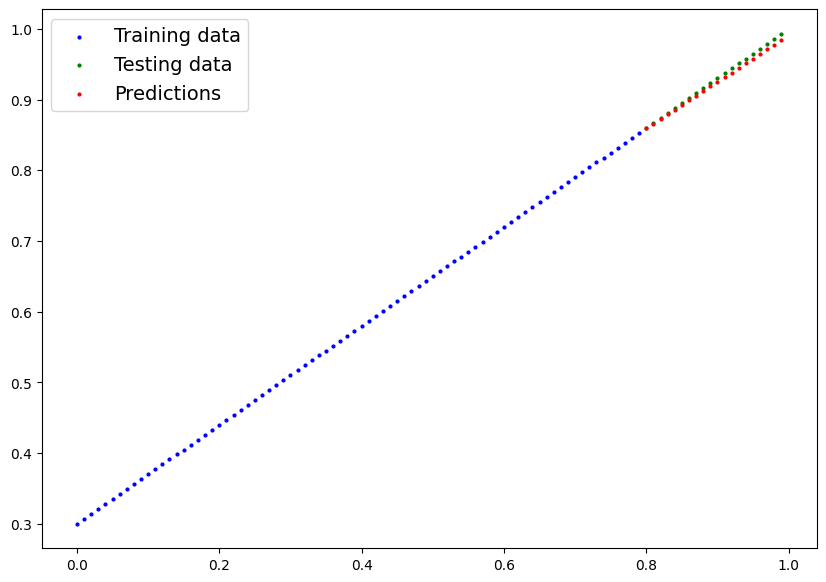

In [ ]:
#turn on the evaluation model
model_3.eval()

#make prediction - inference
with torch.inference_mode():
  y_preds = model_3(X_test_regression)

#plot data and predictions
plot_predictions(train_data=X_train_regression,  #with got errors with tensors, use .cpu() to redirect the tensors to cpu and could work with Numpy tensors, not PyTorch
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression,
                 predictions=y_preds);

Neural Networks are a combination of linear functions and non linear functions

To give the model the power to learn complex patterns you shoul combine linear and non linear function to produce a model capable to learn conmplex features

### The missing piece: non-linearity

"what patterns you could draw if you were given an infinity amount of a straight and non-straight lines?"

Or in machine learning terms, an infinite (but really it is finite)

### Recreating non-linear data - red and blue circles

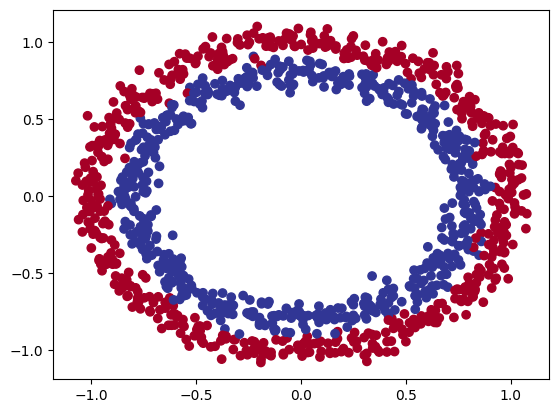

In [ ]:
#Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples2 = 1200

Xc, yc = make_circles(n_samples=n_samples2,
                      noise=0.05,
                      random_state=43)

plt.scatter(Xc[:,0], Xc[:,1], c=yc, cmap=plt.cm.RdYlBu)

In [ ]:
#convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

#turn data into tensors
Xc = torch.from_numpy(Xc).type(torch.float)
yc = torch.from_numpy(yc).type(torch.float)

#split the data into train and test sets

Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc,
                                                        yc,
                                                        test_size=0.2,
                                                        random_state=43)

Xc_train[:5], yc_train[:5]

(tensor([[-0.0843, -0.7759],
         [ 0.4381,  0.7198],
         [ 0.1633, -1.0158],
         [-0.6070, -0.6722],
         [-0.2435, -0.6725]]),
 tensor([1., 1., 0., 1., 1.]))

###Building a model with non-linearity

* Linear = straight lines
* Non-linear = non-straight lines

1- The nmissing piece: Non-linearity

"What could you draw if you had an unlimited amount of straight (linear) and non-linear straight (non-linear) lines?"

ANN - are a large combination about linear and non-linear functions - that are potentially able to find patterns in data.


In [ ]:
#Build a model with non-linear activation function
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    #layer one
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)  #regression
    self.relu = nn.ReLU()  #non-linear activation function

  def forward(self, x):
    #where should we put our non-linear activation function?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_4 = CircleModelV2().to(device)

model_4

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
#setup loss and optmizer
loss_fnc = nn.BCEWithLogitsLoss()
optimizer_c = torch.optim.SGD(model_4.parameters(),
                             lr=0.05)

###Training a model with non-linear model


In [ ]:
#Random seeds
torch.manual_seed(43)
torch.cuda.manual_seed(43)

#put all the data on target device
Xc_train, yc_train = Xc_train.to(device), yc_train.to(device)
Xc_test, yc_test = Xc_test.to(device), yc_test.to(device)

#Loop trough data
epochs = 1000
for epoch in range(epochs):
  #training mode
  model_4.train()   #training mode

  #1.forward pass
  yc_logits = model_4(Xc_train).squeeze()
  yc_pred = torch.round(torch.sigmoid(yc_logits))   # logits -> prediction probabilities -> prediction labels

  #2. calculate the loss
  loss = loss_fn(yc_logits, yc_train)  #BCEwithLogitsLoss - take in logits as 1st inputs
  acc = accuracy_fn(y_true=yc_train,
                    y_pred=yc_pred)

  #3. optmizer  zero grad
  optimizer_c.zero_grad()

  #4. Loss backward
  loss.backward()

  #5. Step the optmizer
  optimizer_c.step()

  ##Testing
  model_4.eval()   #eval mode
  with torch.inference_mode():
    test_logits = model_4(Xc_test).squeeze()
    test_pred_c = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, yc_test)
    test_acc = accuracy_fn(y_true=yc_test,
                           y_pred=test_pred_c)

  # Printing what happens
  if epoch % 100 == 0:
    print(f'Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f} | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}')

Epoch: 0 | Loss: 0.56510, Acc: 46.88 | Test Loss: 0.52401, Test Acc: 53.33
Epoch: 100 | Loss: 0.49808, Acc: 50.21 | Test Loss: 0.49639, Test Acc: 50.42
Epoch: 200 | Loss: 0.49065, Acc: 50.52 | Test Loss: 0.49416, Test Acc: 50.83
Epoch: 300 | Loss: 0.48207, Acc: 50.52 | Test Loss: 0.49102, Test Acc: 51.25
Epoch: 400 | Loss: 0.47025, Acc: 50.73 | Test Loss: 0.48732, Test Acc: 51.25
Epoch: 500 | Loss: 0.45014, Acc: 50.83 | Test Loss: 0.48105, Test Acc: 51.25
Epoch: 600 | Loss: 0.41659, Acc: 51.56 | Test Loss: 0.46624, Test Acc: 51.67
Epoch: 700 | Loss: 0.37053, Acc: 51.56 | Test Loss: 0.41594, Test Acc: 51.25
Epoch: 800 | Loss: 0.27167, Acc: 53.33 | Test Loss: 0.30392, Test Acc: 53.33
Epoch: 900 | Loss: 0.30053, Acc: 79.58 | Test Loss: 0.28865, Test Acc: 50.42


In [ ]:
model_4.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.0651, -0.4292],
                      [ 0.9759, -0.1876],
                      [-1.1481, -0.8819],
                      [ 0.3696, -0.6203],
                      [ 0.3502,  0.1772],
                      [ 0.8385, -0.6682],
                      [ 0.2704,  0.0437],
                      [ 0.0718,  1.0669],
                      [-0.1136, -0.2654],
                      [ 0.6429, -0.9436]])),
             ('layer_1.bias',
              tensor([-0.5555,  0.0088, -0.0727,  0.7524, -0.5207,  0.1283, -0.0208,  0.0327,
                       0.4622, -0.1853])),
             ('layer_2.weight',
              tensor([[ 0.0528, -0.3449, -0.3232,  0.3906,  0.2661, -0.3535,  0.0248, -0.4038,
                        0.3368, -0.5112],
                      [-0.1085,  0.2015,  0.1231, -0.1115,  0.0990,  0.0813, -0.0996, -0.2557,
                       -0.2579,  0.1865],
                      [-0.0319, -0.2613, -0.8946,  0.6438,  0.0994, -0.4

###Evaluating model trained with non-linear activation functions

In [ ]:
#make some predictions
model_4.eval()  #evaluation mode
with torch.inference_mode():
  yc_preds = torch.round(torch.sigmoid(model_4(Xc_test))).squeeze()

y_preds[:10], y_test[:10]

(tensor([[0.8595],
         [0.8660],
         [0.8726],
         [0.8791],
         [0.8857],
         [0.8923],
         [0.8988],
         [0.9054],
         [0.9120],
         [0.9185]]),
 tensor([1., 0., 1., 1., 0., 1., 0., 0., 1., 1.]))

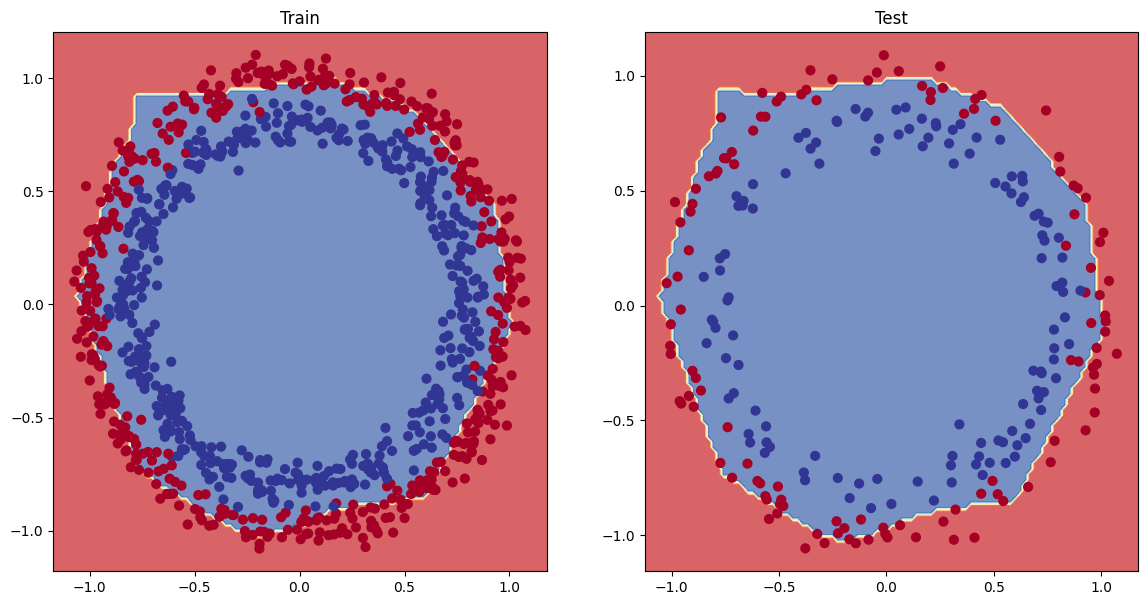

In [ ]:
#Plot decision boundaries
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, Xc_train, yc_train)  #model_4 has non-linearity, model_1 has linearity
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, Xc_test, yc_test)

###Replicating non-linear activation functions

NN, rether than us telling the model what to learn, we give it the tools to discover patterns in data, and it tries to figure out the patterns on its own.

And these tools are linear and non-linear functions

In [ ]:
#Build a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)

A.dtype

torch.float32

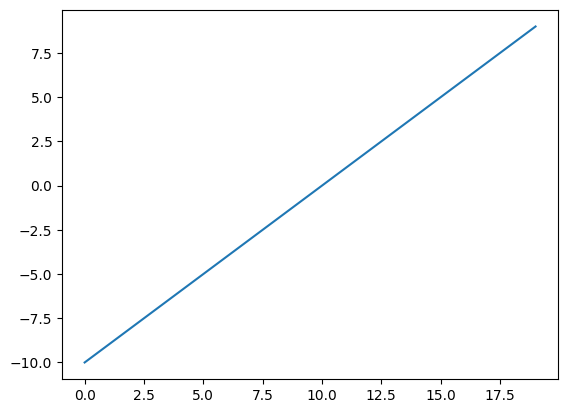

In [ ]:
#visualize the tensor
plt.plot(A)

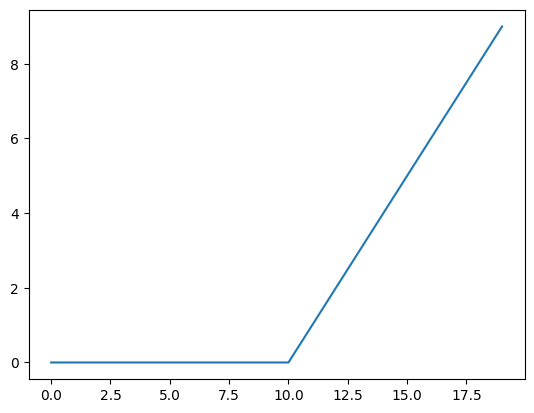

In [ ]:
plt.plot(torch.relu(A))  #replicating the ReLu activation function in A data

In [ ]:
#defining function for ReLU
def relu(x: torch.Tensor) -> torch.Tensor:   #its means that only will accept tensors as input, and the output always be a tensor
  return torch.maximum(torch.tensor(0),x)  #inputs must be tensors

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

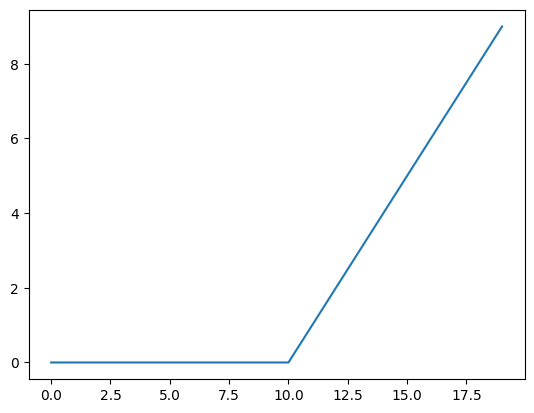

In [ ]:
#plot ReLU activation function
plt.plot(relu(A))

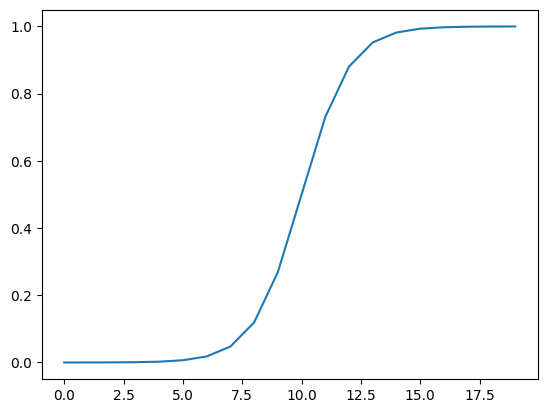

In [ ]:
#now lets do the same for sigmoid activation function
def sigmoid(x):
  return 1/(1+torch.exp(-x))

plt.plot(sigmoid(A))

### Putting it all together with a multiclass classification problem

* Binary classification = one thing or another (cat vs dog, spam vs not spam, fraud or not fraud)
* Multi-class classifcation = more than one thing or another - cat vc dog vs chicken

###Building a toy multi-class dataset

tensor([[-7.5322,  1.3632],
        [-6.9042, -5.6332],
        [-3.4801,  8.4531],
        [-0.6721,  7.0413],
        [-8.1460,  0.5264]]) tensor([0, 1, 2, 2, 0])


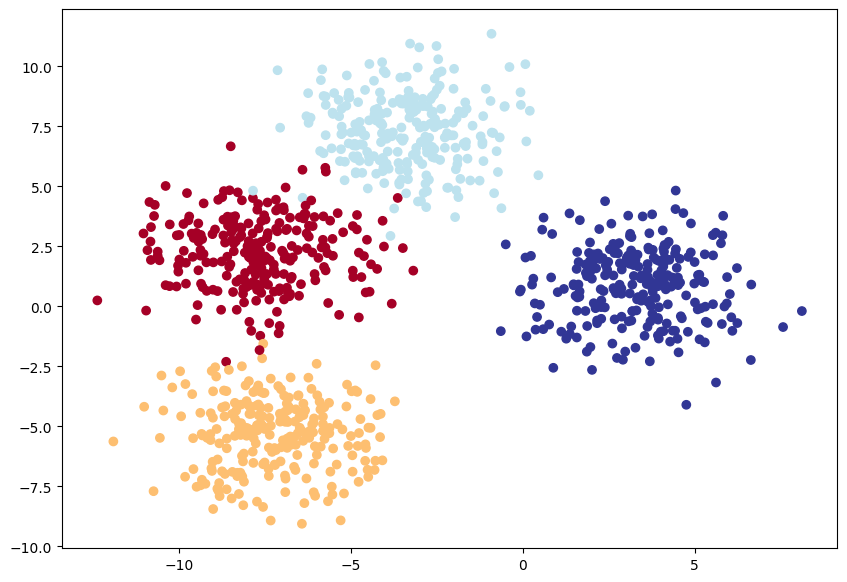

In [ ]:
#importing dependences
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the number of hyperparameters for data build
NUM_CLASSES = 4  # different kinds of blobs
NUM_FEATURES = 2
RANDOM_SEED = 43  #WHEN WRITE WITH CAPITAL LETERS CAN SINALIZE THE YOU CAN CHAGE THIS VALUES - HYPERPARAMETERS ADJUSTABLES

# Build multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.55,  #gives the classes a litle
                            random_state=RANDOM_SEED)

#turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

#Spliting into train and test data
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

#Plot the data - visualize, visualize, visualize
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:,0],X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)

###BUilding a multi-class classification model in PyTorch

1. To define the in_features, how to do this?
  
  * number of neuron per hidden layer
  * output neurons - 1 per class

In [ ]:
#build an device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
#Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """Initilizes multi-class classification model

    Args:
      input_features (int): Number of input features to the model
      output_features (int): number of output features to the model - number of classes
      hidden_units (int): number of hidden unitis between layers, default is 8

    Returns:

    Example:

    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        #nn.ReLu(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        #nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self,x):
    return self.linear_layer_stack(x)

#build an instance and send it to the target device
model_5 = BlobModel(input_features=NUM_FEATURES, #the same of the .shape
                    output_features=NUM_CLASSES,  #the same of the number of classes
                    hidden_units=8).to(device)

model_5  #multi-class classification model


BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
X_blob_train.shape, y_blob_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [ ]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

### Build a loss function and an optmizer for a multi-class classification model


In [ ]:
#loss function in PyTorch  - nn.Module - multi-class - Cross Entropy  - useful for unbalanced training set

loss_fn = nn.CrossEntropyLoss()  #Cross entropy loss

#build an optmizer for muticlass classification
optimizer = torch.optim.SGD(params=model_5.parameters(),
                              lr=0.01)   #learning rate is a hyperparameter you can change


In [ ]:
# Perform a single forward pass on the data (we'll need to put it to the target device for it to work)
model_5(X_blob_train.to(device))[:5]

tensor([[ 1.2032,  0.6470, -0.4864, -1.4761],
        [ 0.0261, -0.1520, -0.4637, -0.6486],
        [ 1.5912,  0.8923, -0.4479, -1.6690],
        [ 0.0260, -0.1376, -0.5004, -0.7123],
        [ 1.5510,  0.8622, -0.4400, -1.6283]], grad_fn=<SliceBackward0>)

In [ ]:
# How many elements in a single prediction sample?
model_5(X_blob_train.to(device))[0].shape, NUM_CLASSES

(torch.Size([4]), 4)

####Getting prediction probabilities for a multi-Class PyTorch model


In order to evaluate and train and test our model, we need to convert our model's outputs (logits) to prediction probabilities and then to prediction labels.

Logits (raw output of the model) -> Pred probs (use `torch.softmax` -> Pred
Labels (take the armax of the prediciton probabilities)

In [ ]:
#lets get some outputs of our model - logits
model_5.eval()  #putting in evaluation model

with torch.inference_mode():
 y_logits = model_5(X_blob_test.to(device))

y_logits[:10]  #each number has four number associate - the probability to belongs for a specific class
#to convert logits in prediction probabilities? Use activation function

tensor([[ 2.1922,  1.1593, -0.1019, -1.4697],
        [ 1.6369,  0.8091, -0.1589, -1.1971],
        [ 0.3987,  0.0970, -0.4609, -0.8932],
        [-0.3331, -0.7127,  0.3472,  1.0021],
        [-0.6866, -0.6732, -0.3550,  0.0176],
        [ 0.2454, -0.0352, -0.3864, -0.6610],
        [-0.0656, -0.2473, -0.3781, -0.4382],
        [-0.0462, -0.2669, -0.2954, -0.3074],
        [ 1.3557,  0.6972, -0.3541, -1.3481],
        [ 0.1814,  0.0321, -0.6663, -1.1049]])

In [ ]:
y_blob_test[:10]


tensor([1, 0, 2, 3, 2, 2, 2, 2, 0, 2])

In [ ]:
#convert our model's logit output to prediction probabilities  - WITHOUT TRAINING YET
y_pred_probs = torch.softmax(y_logits, dim=1)

print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[ 2.1922,  1.1593, -0.1019, -1.4697],
        [ 1.6369,  0.8091, -0.1589, -1.1971],
        [ 0.3987,  0.0970, -0.4609, -0.8932],
        [-0.3331, -0.7127,  0.3472,  1.0021],
        [-0.6866, -0.6732, -0.3550,  0.0176]])
tensor([[0.6745, 0.2401, 0.0680, 0.0173],
        [0.6018, 0.2630, 0.0999, 0.0354],
        [0.4102, 0.3034, 0.1737, 0.1127],
        [0.1341, 0.0917, 0.2647, 0.5095],
        [0.1842, 0.1867, 0.2566, 0.3725]])


In [ ]:
torch.sum(y_pred_probs[0])  #the sum of probabilities always is 1 - 100%

tensor(1.)

In [ ]:
torch.max(y_pred_probs[0])

tensor(0.6745)

In [ ]:
torch.argmax(y_pred_probs[0])

tensor(0)

In [ ]:
#CONVERT our model's prediction probabilities to prediction labels
y_predsss = torch.argmax(y_pred_probs, dim=1)

y_predsss

tensor([0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 0, 3,
        0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0,
        0, 3, 0, 1, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0,
        0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3,
        0, 0, 0, 3, 0, 0, 0, 3, 3, 3, 0, 3, 0, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3,
        0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3, 0,
        0, 0, 0, 3, 0, 0, 0, 0])

In [ ]:
y_blob_test

tensor([1, 0, 2, 3, 2, 2, 2, 2, 0, 2, 2, 3, 0, 0, 2, 2, 3, 3, 0, 1, 2, 0, 2, 0,
        1, 1, 1, 3, 2, 0, 2, 0, 2, 1, 2, 3, 1, 3, 0, 1, 0, 1, 0, 1, 0, 2, 1, 1,
        0, 3, 1, 1, 0, 0, 2, 0, 0, 1, 3, 0, 3, 3, 2, 3, 3, 3, 3, 2, 2, 0, 0, 3,
        1, 0, 1, 3, 3, 3, 0, 1, 2, 0, 2, 3, 2, 0, 2, 2, 0, 0, 1, 3, 1, 2, 3, 0,
        1, 3, 0, 2, 3, 2, 0, 0, 1, 1, 3, 3, 3, 3, 0, 1, 1, 1, 1, 2, 3, 1, 3, 2,
        0, 0, 0, 1, 1, 2, 2, 3, 2, 0, 2, 2, 0, 3, 0, 1, 2, 1, 0, 3, 2, 3, 3, 3,
        1, 0, 2, 3, 1, 1, 2, 3, 3, 3, 1, 3, 1, 2, 3, 3, 3, 2, 3, 1, 2, 2, 1, 3,
        2, 2, 0, 0, 3, 1, 3, 1, 0, 2, 1, 0, 2, 0, 2, 1, 0, 2, 2, 0, 1, 3, 3, 0,
        2, 2, 2, 3, 1, 2, 0, 0])

### Building a training loop and testing loop for a multi-class PyTorch model


In [ ]:
y_blob_train.dtype

torch.int64

In [ ]:
# How many elements in a single prediction sample?
model_4(X_blob_train.to(device))[0].shape, NUM_CLASSES

(torch.Size([1]), 4)

In [ ]:
#Fit the multi-class model to the data
torch.manual_seed(43)
#torch.cuda.manual_seed(43)

#set the number of epochs
epochs = 100

#put the target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

#loop trough data
for epoch in range(epochs): #run during the range
  ##training our 1st multi-class model
  model_5.train()  #putting in training mode

  y_logits = model_5(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  #calculate the loss
  loss = loss_fn(y_logits, y_blob_train)
  #print(y_blob_train.shape, "\n", y_pred.shape)
  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #Testing
  model_5.eval()  #evaluation mode

  with torch.inference_mode():
    test_logits = model_5(X_blob_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)  #the loss function was setted wrong
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_preds)

  #Printing what happens
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")



Epoch: 0 | Loss: 1.1339, Acc: 47.88% | Test Loss: 1.1032, Test Accuracy: 49.00%
Epoch: 10 | Loss: 0.8650, Acc: 64.00% | Test Loss: 0.8485, Test Accuracy: 66.50%
Epoch: 20 | Loss: 0.7029, Acc: 95.50% | Test Loss: 0.6895, Test Accuracy: 97.50%
Epoch: 30 | Loss: 0.5900, Acc: 96.00% | Test Loss: 0.5762, Test Accuracy: 98.00%
Epoch: 40 | Loss: 0.5043, Acc: 96.50% | Test Loss: 0.4898, Test Accuracy: 98.00%
Epoch: 50 | Loss: 0.4370, Acc: 97.12% | Test Loss: 0.4219, Test Accuracy: 98.00%
Epoch: 60 | Loss: 0.3834, Acc: 97.50% | Test Loss: 0.3680, Test Accuracy: 98.00%
Epoch: 70 | Loss: 0.3403, Acc: 97.50% | Test Loss: 0.3245, Test Accuracy: 98.50%
Epoch: 80 | Loss: 0.3053, Acc: 97.62% | Test Loss: 0.2892, Test Accuracy: 98.50%
Epoch: 90 | Loss: 0.2764, Acc: 97.62% | Test Loss: 0.2600, Test Accuracy: 99.00%


* **How to solve and develop a model?**
* Run the code, see what errors come out, Google the errors, read the documentation, try again `=)`


### Making and evaluation predictions with a PyTorch multi-class model

In [ ]:
#make predictions
model_5.eval()  #putting the model in evaluation mode
with torch.inference_mode():
  y_logits = model_5(X_blob_test)

#view the first 10 predictions
y_logits[:10]

tensor([[ 3.9123,  5.0053, -1.1053, -5.0298],
        [ 3.0046,  2.8806, -0.3191, -3.9713],
        [ 1.3114, -2.5646,  2.0051, -2.4826],
        [-1.5561, -1.7887,  0.1555,  3.3160],
        [-0.8740, -5.8372,  2.8316,  0.6698],
        [ 0.8900, -2.7858,  1.9273, -1.7404],
        [ 0.3053, -3.8129,  2.2361, -0.9466],
        [ 0.1843, -3.4118,  1.9449, -0.5812],
        [ 2.8595,  1.1317,  0.6222, -4.2640],
        [ 1.3025, -4.1373,  2.9110, -2.9811]])

In [ ]:
#Go from logits -> Prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

y_pred_probs[:10]

tensor([[2.5063e-01, 7.4768e-01, 1.6593e-03, 3.2773e-05],
        [5.2073e-01, 4.6003e-01, 1.8757e-02, 4.8645e-04],
        [3.2846e-01, 6.8101e-03, 6.5734e-01, 7.3925e-03],
        [7.2505e-03, 5.7458e-03, 4.0151e-02, 9.4685e-01],
        [2.1570e-02, 1.5078e-04, 8.7729e-01, 1.0099e-01],
        [2.5516e-01, 6.4630e-03, 7.1999e-01, 1.8385e-02],
        [1.2199e-01, 1.9852e-03, 8.4114e-01, 3.4883e-02],
        [1.3682e-01, 3.7531e-03, 7.9578e-01, 6.3641e-02],
        [7.7807e-01, 1.3825e-01, 8.3058e-02, 6.2708e-04],
        [1.6630e-01, 7.2175e-04, 8.3068e-01, 2.2936e-03]])

In [ ]:
y_blob_test

tensor([1, 0, 2, 3, 2, 2, 2, 2, 0, 2, 2, 3, 0, 0, 2, 2, 3, 3, 0, 1, 2, 0, 2, 0,
        1, 1, 1, 3, 2, 0, 2, 0, 2, 1, 2, 3, 1, 3, 0, 1, 0, 1, 0, 1, 0, 2, 1, 1,
        0, 3, 1, 1, 0, 0, 2, 0, 0, 1, 3, 0, 3, 3, 2, 3, 3, 3, 3, 2, 2, 0, 0, 3,
        1, 0, 1, 3, 3, 3, 0, 1, 2, 0, 2, 3, 2, 0, 2, 2, 0, 0, 1, 3, 1, 2, 3, 0,
        1, 3, 0, 2, 3, 2, 0, 0, 1, 1, 3, 3, 3, 3, 0, 1, 1, 1, 1, 2, 3, 1, 3, 2,
        0, 0, 0, 1, 1, 2, 2, 3, 2, 0, 2, 2, 0, 3, 0, 1, 2, 1, 0, 3, 2, 3, 3, 3,
        1, 0, 2, 3, 1, 1, 2, 3, 3, 3, 1, 3, 1, 2, 3, 3, 3, 2, 3, 1, 2, 2, 1, 3,
        2, 2, 0, 0, 3, 1, 3, 1, 0, 2, 1, 0, 2, 0, 2, 1, 0, 2, 2, 0, 1, 3, 3, 0,
        2, 2, 2, 3, 1, 2, 0, 0])

In [ ]:
#go from pred_probs to pred_labels
y_preds = torch.argmax(y_pred_probs, dim=1)

y_preds

tensor([1, 0, 2, 3, 2, 2, 2, 2, 0, 2, 2, 3, 0, 0, 2, 2, 2, 3, 0, 1, 2, 0, 2, 0,
        1, 1, 1, 3, 2, 0, 2, 0, 2, 1, 2, 3, 1, 3, 0, 1, 0, 1, 0, 1, 0, 2, 1, 1,
        0, 3, 1, 1, 0, 0, 2, 0, 0, 1, 3, 0, 3, 3, 2, 3, 3, 3, 3, 2, 2, 0, 0, 3,
        1, 0, 1, 3, 3, 3, 0, 1, 2, 0, 2, 3, 2, 0, 2, 2, 0, 0, 1, 3, 1, 2, 3, 0,
        1, 3, 0, 2, 3, 2, 0, 0, 1, 1, 3, 3, 3, 3, 0, 1, 1, 1, 1, 2, 3, 1, 3, 2,
        0, 0, 0, 1, 1, 2, 2, 3, 2, 0, 2, 2, 0, 3, 0, 1, 2, 1, 0, 2, 2, 3, 3, 3,
        1, 0, 2, 3, 1, 1, 2, 3, 3, 3, 1, 3, 1, 2, 3, 3, 3, 2, 3, 1, 2, 2, 1, 3,
        2, 2, 0, 0, 3, 1, 3, 1, 0, 2, 1, 0, 2, 0, 2, 1, 0, 2, 2, 0, 1, 3, 3, 0,
        2, 2, 2, 3, 1, 2, 0, 0])

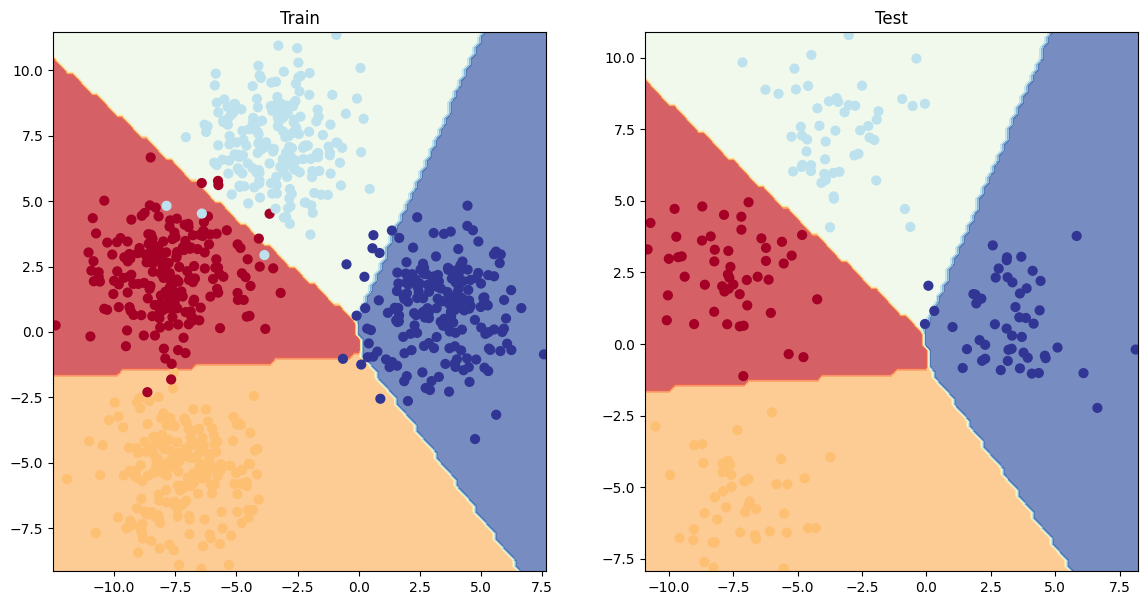

In [ ]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_5, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_5, X_blob_test, y_blob_test)

### A few more classification metrics - to evaluate the classification model

* Accuracy - out of 100 examples, how many does our model get right? - for balanced datasets
* Precision -
* Recall -
* F1-Score
* Confusion Matrix
* Classification Report

See some articles - beyond-accuracy-precision-and-recall
If want to access a lot of PyTorch metrics, see TorchMetrics

In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 14.8 MB/s eta 0:00:00


In [ ]:
from torchmetrics import Accuracy, Precision, Recall, F1Score, ConfusionMatrix

#setup metric
torchmetric_accuracy = Accuracy(task='multiclass', num_classes=4)  #should say to the function the kind of problem to measure the metric, and how much classes

#precision
torchmetric_precision = Precision(task='multiclass', num_classes=4)

#recall
torchmetric_recall = Recall(task='multiclass', num_classes=4)

#F1Score
torchmetric_f1score = F1Score(task='multiclass', num_classes=4)

#calculate the metric
print("Accuracy: ", torchmetric_accuracy(y_preds, y_blob_test))

print("Precision: ", torchmetric_precision(y_preds, y_blob_test))

print("Recall: ", torchmetric_accuracy(y_preds, y_blob_test))

print("F1-Score: ", torchmetric_f1score(y_preds, y_blob_test))




Accuracy:  tensor(0.9900)
Precision:  tensor(0.9900)
Recall:  tensor(0.9900)
F1-Score:  tensor(0.9900)
